In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import datetime

In [2]:
def read_var(varname, filename):
    with open(filename, 'r') as f:
        data = f.readlines()

    for (i,x) in enumerate(data):
        if ' ' + varname in x: start = i
                
    end = i
    for (i,x) in enumerate(data[start:]):
        if not x.strip(): lenblock = i; break
    var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
    return var

In [3]:
def to_xr(var):
    var.to_xarray()

In [4]:
def filesanddates():    
    filename = "/Users/tobias/files.txt"
    with open(filename, 'r') as f:
        data = f.readlines()
    
    years = [int(d[0:4]) for d in data]
    months = [(d[5:7]) for d in data]
    monthss = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
    mon = [monthss.index(m) for m in months]
    test = [d[0:7] for d in data]
    date = [datetime.datetime(years[i], mon[i]+1, 1) for i in range(len(years))]
    
# filename = '/Users/tobias/Desktop/QBO Ancistrus/test10a.dat'
#    years = range(2002,2013)
#    year = [str(y) for y in range(2002,2013)]
#    months = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
#    month = [str(m) for m in months]
#    test = []
#    date = []
#    for y in year:
#        for m in month:
#            test.append( y + '_' + m )
#            date.append(datetime.datetime(years[year.index(y)], month.index(m)+1, 1))
#    
#    test = np.delete(test, [0,1,2,3,4,5,6,27,28,29,30,31,32,33,34,35,-8,-7,-6,-5,-4,-3,-2,-1])
#    date = np.delete(date, [0,1,2,3,4,5,6,27,28,29,30,31,32,33,34,35,-8,-7,-6,-5,-4,-3,-2,-1])
    return(test, date)

In [5]:
def readvars(filename):
    varname = 'v_phi'
    var = read_var(varname, filename)

    varname = 'v_z'
    varz = read_var(varname, filename)

    varname = 'model altitude'
    alt = read_var(varname, filename)

    varname = 'model latitude'
    lat = read_var(varname, filename)

    latlist = lat.T.to_xarray().to_array().values.ravel()
    latlist = latlist[~np.isnan(latlist)]
    #print(latlist)
    altlist = alt.T.to_xarray().to_array().values.ravel()
    altlist = altlist[~np.isnan(altlist)]
    #print(altlist)
    varlist = var.to_xarray().to_array().values.ravel()
    varlist.resize(len(altlist),len(latlist))

    varzlist = varz.to_xarray().to_array().values.ravel()
    varzlist.resize(len(altlist),len(latlist))

    #print(np.shape(varlist),np.shape(var))
    
    varlist = varlist[np.newaxis,...]
    varzlist = varzlist[np.newaxis,...]
    return(varlist,varzlist,altlist,latlist)

In [6]:
def readvars2(filename):
    varname = 'v_phi'
    var = read_var(varname, filename)

    varname = 'v_z'
    varz = read_var(varname, filename)

    varname = 'model altitude'
    alt = read_var(varname, filename)

    varname = 'model latitude'
    lat = read_var(varname, filename)

    latlist = lat.T.to_xarray().to_array().values.ravel()
    latlist = latlist[~np.isnan(latlist)]
    #print(latlist)
    altlist = alt.T.to_xarray().to_array().values.ravel()
    altlist = altlist[~np.isnan(altlist)]
    #print(altlist)
    varlist = var.to_xarray().to_array().values.ravel()
    varlist.resize(len(latlist),len(altlist))

    varzlist = varz.to_xarray().to_array().values.ravel()
    varzlist.resize(len(latlist),len(altlist))
    #print(np.shape(varlist),np.shape(var))
    
    varlist = varlist[np.newaxis,...]
    varzlist = varzlist[np.newaxis,...]
    return(varlist,varzlist,altlist,latlist)

In [7]:
#df = pd.DataFrame({'year': [2014],
#...                    'month': [9],
#...                    'day': [6]})
#time = pd.to_datetime(df)

In [8]:
def mkds(varlist,varzlist,latlist, altlist,time):# define data with variable attributes
    data_vars = {'v_phi':(['time', 'alt', 'lat'], varlist, 
                         {'units': 'm/s', 
                          'long_name':'meridional velocity'}),
                 'v_z'  :(['time', 'alt', 'lat'], varzlist, 
                         {'units': 'm/s', 
                          'long_name':'vertical velocity'})}

# define coordinates
    coords = {'time': (['time'], [time]),
         'lat': (['lat'], latlist),
         'alt': (['alt'], altlist)}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [9]:
def mkds2(varlist,varzlist,latlist, altlist,time):# define data with variable attributes
    data_vars = {'v_phi':(['time', 'lat', 'alt'], varlist, 
                         {'units': 'm/s', 
                          'long_name':'meridional velocity'}),
                 'v_z'  :(['time', 'lat', 'alt'], varzlist, 
                         {'units': 'm/s', 
                          'long_name':'vertical velocity'})}

# define coordinates
    coords = {'time': (['time'], [time]),
         'lat': (['lat'], latlist),
         'alt': (['alt'], altlist)}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [ ]:
ds.to_netcdf('est.nc')

In [ ]:
import datetime

d = datetime.datetime(2019, 4, 13)
print(d)

In [ ]:
for t in test:
    print(t)
    print(date[test.index(t)])

In [11]:
test, date = filesanddates()
#test=test[0:2]
#date=date[0:2]
for i,t in enumerate(test):
    filename = '/Users/tobias/Mount/Ancistrus/test10a_'+t+'/output/test10a.dat'
    time = date[i]
    print(filename,time,i)
    varlist, varzlist, altlist, latlist = readvars(filename)
    ds1 = mkds(varlist,varzlist,latlist, altlist,time)
    if i==0 : 
        ds = mkds(varlist,varzlist,latlist, altlist,time)
    else:
        ds= xr.concat([ds,mkds(varlist,varzlist,latlist, altlist,time)],dim='time')
    print(ds)


/Users/tobias/Mount/Ancistrus/test10a_2002_AS/output/test10a.dat 2002-09-01 00:00:00 0


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 1, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2047 0.05528
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.002155
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_JA/output/test10a.dat 2002-08-01 00:00:00 1


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 2, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.02466 0.03492
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001071
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_ND/output/test10a.dat 2002-12-01 00:00:00 2


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 3, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 2002-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1654 -0.04226
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.002116
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_ON/output/test10a.dat 2002-11-01 00:00:00 3


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 4, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 2002-12-01 2002-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1966 0.03478
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0004542
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_SO/output/test10a.dat 2002-10-01 00:00:00 4


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 5, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2002-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1362 -0.02554
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.003848
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_AM/output/test10a.dat 2003-05-01 00:00:00 5


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 6, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-05-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.08688 -0.03558
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.002513
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_AS/output/test10a.dat 2003-09-01 00:00:00 6


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 7, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2155 -0.1571
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001289
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_DJ/output/test10a.dat 2003-01-01 00:00:00 7


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 8, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.05953 -0.06666
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001254
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_FM/output/test10a.dat 2003-03-01 00:00:00 8


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 9, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1258 0.02518
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0005239
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_JA/output/test10a.dat 2003-08-01 00:00:00 9


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 10, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.04499 -0.01764
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.00141
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_JF/output/test10a.dat 2003-02-01 00:00:00 10


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 11, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.0839 0.03774
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001551
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_JJ/output/test10a.dat 2003-07-01 00:00:00 11


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 12, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-07-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1502 -0.03027
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0006473
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_MA/output/test10a.dat 2003-04-01 00:00:00 12


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 13, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.02187 -0.1309
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.002491
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_MJ/output/test10a.dat 2003-06-01 00:00:00 13


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 14, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2066 -0.08479
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.00117 0.003207
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_ND/output/test10a.dat 2003-12-01 00:00:00 14


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 15, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 ... -0.02444 -0.006796
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001483
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_ON/output/test10a.dat 2003-11-01 00:00:00 15


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 16, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2536 0.0002071
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.000908
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_SO/output/test10a.dat 2003-10-01 00:00:00 16


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 17, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2003-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2267 -0.04106
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001782
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2004_DJ/output/test10a.dat 2004-01-01 00:00:00 17


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 18, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2004-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.02424 0.01429
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001711
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2004_FM/output/test10a.dat 2004-03-01 00:00:00 18


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 19, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2004-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.04688 -0.06024
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.002934
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2004_JF/output/test10a.dat 2004-02-01 00:00:00 19


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 20, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2004-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1079 0.07678
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.002033
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_AM/output/test10a.dat 2005-05-01 00:00:00 20


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 21, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2005-05-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.04969 -0.01173
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.002231
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_FM/output/test10a.dat 2005-03-01 00:00:00 21


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 22, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2005-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.05058 -0.01881
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0006027
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_JA/output/test10a.dat 2005-08-01 00:00:00 22


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 23, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2005-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.07169 0.02358
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0003577
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_JF/output/test10a.dat 2005-02-01 00:00:00 23


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 24, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2005-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1092 -0.02779
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0006875
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_JJ/output/test10a.dat 2005-07-01 00:00:00 24


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 25, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2005-07-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.0597 0.02303
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.000306
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_MA/output/test10a.dat 2005-04-01 00:00:00 25


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 26, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2005-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1418 0.01643
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0001299
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_MJ/output/test10a.dat 2005-06-01 00:00:00 26


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 27, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2005-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.05698 0.004253
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0009501
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_AS/output/test10a.dat 2006-09-01 00:00:00 27


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 28, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2294 -0.05116
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.000185
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_DJ/output/test10a.dat 2006-01-01 00:00:00 28


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 29, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.2641 -0.4545
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.008298
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_JA/output/test10a.dat 2006-08-01 00:00:00 29


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 30, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.03593 -0.07713
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0002653
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_JJ/output/test10a.dat 2006-07-01 00:00:00 30


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 31, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-07-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.135 -0.07893
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 7.396e-06
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_MJ/output/test10a.dat 2006-06-01 00:00:00 31


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 32, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.01165 -0.03724
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.000557
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_ND/output/test10a.dat 2006-12-01 00:00:00 32


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 33, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2021 -0.02186
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0001459
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_ON/output/test10a.dat 2006-11-01 00:00:00 33


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 34, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.311 0.04706
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001599
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_SO/output/test10a.dat 2006-10-01 00:00:00 34


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 35, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2006-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2338 -0.0558
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001212
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_AM/output/test10a.dat 2007-05-01 00:00:00 35


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 36, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-05-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.01197 0.08796
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0003447
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_AS/output/test10a.dat 2007-09-01 00:00:00 36


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 37, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1699 -0.01276
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0003396
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_DJ/output/test10a.dat 2007-01-01 00:00:00 37


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 38, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2121 -0.004314
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0005211
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_FM/output/test10a.dat 2007-03-01 00:00:00 38


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 39, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.09732 0.04092
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0008607
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_JA/output/test10a.dat 2007-08-01 00:00:00 39


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 40, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.05252 -0.05488
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0005566
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_JF/output/test10a.dat 2007-02-01 00:00:00 40


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 41, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09055 -0.02444
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0002583
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_JJ/output/test10a.dat 2007-07-01 00:00:00 41


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 42, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-07-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.07444 0.02037
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0002669
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_MA/output/test10a.dat 2007-04-01 00:00:00 42


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 43, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.05017 -0.1719
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001519
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_MJ/output/test10a.dat 2007-06-01 00:00:00 43


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 44, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.07476 -0.008462
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0009844 0.00116
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_ND/output/test10a.dat 2007-12-01 00:00:00 44


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 45, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.07891 0.001851
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0005652
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_ON/output/test10a.dat 2007-11-01 00:00:00 45


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 46, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2762 0.0309
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001286
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_SO/output/test10a.dat 2007-10-01 00:00:00 46


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 47, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2007-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.188 -0.04287
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001581
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_AM/output/test10a.dat 2008-05-01 00:00:00 47


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 48, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-05-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.07975 -0.0308
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0007244 0.00217
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_AS/output/test10a.dat 2008-09-01 00:00:00 48


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 49, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.01319 0.003594
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.000158
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_DJ/output/test10a.dat 2008-01-01 00:00:00 49


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 50, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1556 -0.03028
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0005178
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_FM/output/test10a.dat 2008-03-01 00:00:00 50


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 51, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1869 0.04648
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001056
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_JA/output/test10a.dat 2008-08-01 00:00:00 51


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 52, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1099 -0.1504
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -1.634e-05
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_JF/output/test10a.dat 2008-02-01 00:00:00 52


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 53, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.02957 -0.03472
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0002989
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_JJ/output/test10a.dat 2008-07-01 00:00:00 53


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 54, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-07-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.02841 -0.04499
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0003748
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_MA/output/test10a.dat 2008-04-01 00:00:00 54


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 55, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.06195 -0.01121
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0007575
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_MJ/output/test10a.dat 2008-06-01 00:00:00 55


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 56, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 ... -0.009312 -0.01764
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001419
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_ND/output/test10a.dat 2008-12-01 00:00:00 56


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 57, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 ... -0.006954 -0.04098
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0007184
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_ON/output/test10a.dat 2008-11-01 00:00:00 57


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 58, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.147 0.03649
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0008649
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_SO/output/test10a.dat 2008-10-01 00:00:00 58


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 59, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2008-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.3227 -0.01028
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.002428
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_AM/output/test10a.dat 2009-05-01 00:00:00 59


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 60, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-05-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1922 -0.1156
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001664
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_AS/output/test10a.dat 2009-09-01 00:00:00 60


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 61, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2112 0.07189
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0001124
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_DJ/output/test10a.dat 2009-01-01 00:00:00 61


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 62, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.198 0.01724
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0004645
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_FM/output/test10a.dat 2009-03-01 00:00:00 62


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 63, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2543 0.1218
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.002113
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_JA/output/test10a.dat 2009-08-01 00:00:00 63


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 64, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.01969 0.007696
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -4.254e-05
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_JF/output/test10a.dat 2009-02-01 00:00:00 64


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 65, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.002326 0.06329
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.003918
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_JJ/output/test10a.dat 2009-07-01 00:00:00 65


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 66, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-07-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.02022 -0.004663
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0001005
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_MA/output/test10a.dat 2009-04-01 00:00:00 66


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 67, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1389 1.668
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -2.597e-05
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_MJ/output/test10a.dat 2009-06-01 00:00:00 67


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 68, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.06723 -0.04916
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0004058
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_ND/output/test10a.dat 2009-12-01 00:00:00 68


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 69, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.109 -0.007202
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -9.382e-05
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_ON/output/test10a.dat 2009-11-01 00:00:00 69


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 70, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.3566 0.0519
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001643
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_SO/output/test10a.dat 2009-10-01 00:00:00 70


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 71, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2009-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2549 -0.04149
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001913
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_AM/output/test10a.dat 2010-05-01 00:00:00 71


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 72, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-05-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1784 -0.09046
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0008374
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_AS/output/test10a.dat 2010-09-01 00:00:00 72


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 73, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2041 -0.008354
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -4.158e-05
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_DJ/output/test10a.dat 2010-01-01 00:00:00 73


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 74, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.3155 0.000772
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -1.601e-05
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_FM/output/test10a.dat 2010-03-01 00:00:00 74


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 75, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.09707 0.05955
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0004588
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_JA/output/test10a.dat 2010-08-01 00:00:00 75


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 76, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.06013 -0.05861
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -5.083e-05
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_JF/output/test10a.dat 2010-02-01 00:00:00 76


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 77, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.09958 0.005284
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.000856
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_JJ/output/test10a.dat 2010-07-01 00:00:00 77


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 78, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-07-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.01286 -0.05019
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0002632
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_MA/output/test10a.dat 2010-04-01 00:00:00 78


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 79, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1288 -0.1498
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0008446
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_MJ/output/test10a.dat 2010-06-01 00:00:00 79


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 80, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.015 -0.02837
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.0005856
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_ND/output/test10a.dat 2010-12-01 00:00:00 80


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 81, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1312 0.02234
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0007612
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_ON/output/test10a.dat 2010-11-01 00:00:00 81


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 82, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.5703 0.04634
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001282
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_SO/output/test10a.dat 2010-10-01 00:00:00 82


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 83, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2010-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2162 -0.04415
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.001534
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_AM/output/test10a.dat 2011-05-01 00:00:00 83


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 84, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-05-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1092 -0.03549
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001192
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_AS/output/test10a.dat 2011-09-01 00:00:00 84


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 85, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-09-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.1236 -0.01943
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0002838
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_DJ/output/test10a.dat 2011-01-01 00:00:00 85


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 86, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1994 0.003008
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.000242
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_FM/output/test10a.dat 2011-03-01 00:00:00 86


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 87, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 ... -0.09373 -0.0008088
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0003848
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_JA/output/test10a.dat 2011-08-01 00:00:00 87


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 88, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-08-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.03491 -0.1476
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0002401
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_JF/output/test10a.dat 2011-02-01 00:00:00 88


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 89, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1701 -0.04698
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.0001287
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_MA/output/test10a.dat 2011-04-01 00:00:00 89


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 90, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.1228 -0.2263
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.00124
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_MJ/output/test10a.dat 2011-06-01 00:00:00 90


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 91, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-06-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.02992 -0.08938
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001179 0.001152
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_ND/output/test10a.dat 2011-12-01 00:00:00 91


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 92, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-12-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.09089 -0.042
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.000672
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_ON/output/test10a.dat 2011-11-01 00:00:00 92


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 93, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-11-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.402 0.06621
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.002331
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_SO/output/test10a.dat 2011-10-01 00:00:00 93


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 94, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2011-10-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.2832 -0.01128
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.002773
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_DJ/output/test10a.dat 2012-01-01 00:00:00 94


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 95, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-01-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.0255 -0.09372
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.00115 0.001759
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_FM/output/test10a.dat 2012-03-01 00:00:00 95


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 96, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-03-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.06986 -0.0336
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 6.72e-05 0.00216
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_JF/output/test10a.dat 2012-02-01 00:00:00 96


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 97, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-02-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... 0.4467 0.1309
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... -0.003378
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_MA/output/test10a.dat 2012-04-01 00:00:00 97


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)


In [13]:
test, date = filesanddates()
#test=test[0:2]
#date=date[0:2]
for i,t in enumerate(test):
    filename = '/Users/tobias/Mount/Ancistrus/test10a_'+t+'/output/test10a.dat'
    time = date[i]
    print(filename,time,i)
    varlist, varzlist, altlist, latlist = readvars2(filename)
    #ds1 = mkds2(varlist,varzlist,latlist, altlist,time)
    if i==0 : 
        ds2 = mkds2(varlist,varzlist,latlist, altlist,time)
    else:
        ds2= xr.concat([ds,mkds2(varlist,varzlist,latlist, altlist,time)],dim='time')
    print(ds)


/Users/tobias/Mount/Ancistrus/test10a_2002_AS/output/test10a.dat 2002-09-01 00:00:00 0


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_JA/output/test10a.dat 2002-08-01 00:00:00 1


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_ND/output/test10a.dat 2002-12-01 00:00:00 2


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_ON/output/test10a.dat 2002-11-01 00:00:00 3


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2002_SO/output/test10a.dat 2002-10-01 00:00:00 4


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_AM/output/test10a.dat 2003-05-01 00:00:00 5


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_AS/output/test10a.dat 2003-09-01 00:00:00 6


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_DJ/output/test10a.dat 2003-01-01 00:00:00 7


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_FM/output/test10a.dat 2003-03-01 00:00:00 8


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_JA/output/test10a.dat 2003-08-01 00:00:00 9


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_JF/output/test10a.dat 2003-02-01 00:00:00 10


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_JJ/output/test10a.dat 2003-07-01 00:00:00 11


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_MA/output/test10a.dat 2003-04-01 00:00:00 12


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_MJ/output/test10a.dat 2003-06-01 00:00:00 13


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_ND/output/test10a.dat 2003-12-01 00:00:00 14


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_ON/output/test10a.dat 2003-11-01 00:00:00 15


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2003_SO/output/test10a.dat 2003-10-01 00:00:00 16


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2004_DJ/output/test10a.dat 2004-01-01 00:00:00 17


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2004_FM/output/test10a.dat 2004-03-01 00:00:00 18


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2004_JF/output/test10a.dat 2004-02-01 00:00:00 19


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_AM/output/test10a.dat 2005-05-01 00:00:00 20


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_FM/output/test10a.dat 2005-03-01 00:00:00 21


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_JA/output/test10a.dat 2005-08-01 00:00:00 22


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_JF/output/test10a.dat 2005-02-01 00:00:00 23


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_JJ/output/test10a.dat 2005-07-01 00:00:00 24


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_MA/output/test10a.dat 2005-04-01 00:00:00 25


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2005_MJ/output/test10a.dat 2005-06-01 00:00:00 26


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_AS/output/test10a.dat 2006-09-01 00:00:00 27


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_DJ/output/test10a.dat 2006-01-01 00:00:00 28


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_JA/output/test10a.dat 2006-08-01 00:00:00 29


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_JJ/output/test10a.dat 2006-07-01 00:00:00 30


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_MJ/output/test10a.dat 2006-06-01 00:00:00 31


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_ND/output/test10a.dat 2006-12-01 00:00:00 32


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_ON/output/test10a.dat 2006-11-01 00:00:00 33


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2006_SO/output/test10a.dat 2006-10-01 00:00:00 34


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_AM/output/test10a.dat 2007-05-01 00:00:00 35


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_AS/output/test10a.dat 2007-09-01 00:00:00 36


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_DJ/output/test10a.dat 2007-01-01 00:00:00 37


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_FM/output/test10a.dat 2007-03-01 00:00:00 38


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_JA/output/test10a.dat 2007-08-01 00:00:00 39


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_JF/output/test10a.dat 2007-02-01 00:00:00 40


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_JJ/output/test10a.dat 2007-07-01 00:00:00 41


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_MA/output/test10a.dat 2007-04-01 00:00:00 42


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_MJ/output/test10a.dat 2007-06-01 00:00:00 43


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_ND/output/test10a.dat 2007-12-01 00:00:00 44


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_ON/output/test10a.dat 2007-11-01 00:00:00 45


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2007_SO/output/test10a.dat 2007-10-01 00:00:00 46


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_AM/output/test10a.dat 2008-05-01 00:00:00 47


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_AS/output/test10a.dat 2008-09-01 00:00:00 48


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_DJ/output/test10a.dat 2008-01-01 00:00:00 49


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_FM/output/test10a.dat 2008-03-01 00:00:00 50


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_JA/output/test10a.dat 2008-08-01 00:00:00 51


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_JF/output/test10a.dat 2008-02-01 00:00:00 52


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_JJ/output/test10a.dat 2008-07-01 00:00:00 53


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_MA/output/test10a.dat 2008-04-01 00:00:00 54


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_MJ/output/test10a.dat 2008-06-01 00:00:00 55


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_ND/output/test10a.dat 2008-12-01 00:00:00 56


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_ON/output/test10a.dat 2008-11-01 00:00:00 57


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2008_SO/output/test10a.dat 2008-10-01 00:00:00 58


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_AM/output/test10a.dat 2009-05-01 00:00:00 59


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_AS/output/test10a.dat 2009-09-01 00:00:00 60


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_DJ/output/test10a.dat 2009-01-01 00:00:00 61


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_FM/output/test10a.dat 2009-03-01 00:00:00 62


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_JA/output/test10a.dat 2009-08-01 00:00:00 63


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_JF/output/test10a.dat 2009-02-01 00:00:00 64


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_JJ/output/test10a.dat 2009-07-01 00:00:00 65


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_MA/output/test10a.dat 2009-04-01 00:00:00 66


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_MJ/output/test10a.dat 2009-06-01 00:00:00 67


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_ND/output/test10a.dat 2009-12-01 00:00:00 68


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_ON/output/test10a.dat 2009-11-01 00:00:00 69


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2009_SO/output/test10a.dat 2009-10-01 00:00:00 70


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_AM/output/test10a.dat 2010-05-01 00:00:00 71


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_AS/output/test10a.dat 2010-09-01 00:00:00 72


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_DJ/output/test10a.dat 2010-01-01 00:00:00 73


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_FM/output/test10a.dat 2010-03-01 00:00:00 74


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_JA/output/test10a.dat 2010-08-01 00:00:00 75


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_JF/output/test10a.dat 2010-02-01 00:00:00 76


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_JJ/output/test10a.dat 2010-07-01 00:00:00 77


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_MA/output/test10a.dat 2010-04-01 00:00:00 78


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_MJ/output/test10a.dat 2010-06-01 00:00:00 79


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_ND/output/test10a.dat 2010-12-01 00:00:00 80


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_ON/output/test10a.dat 2010-11-01 00:00:00 81


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2010_SO/output/test10a.dat 2010-10-01 00:00:00 82


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_AM/output/test10a.dat 2011-05-01 00:00:00 83


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_AS/output/test10a.dat 2011-09-01 00:00:00 84


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_DJ/output/test10a.dat 2011-01-01 00:00:00 85


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_FM/output/test10a.dat 2011-03-01 00:00:00 86


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_JA/output/test10a.dat 2011-08-01 00:00:00 87


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_JF/output/test10a.dat 2011-02-01 00:00:00 88


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_MA/output/test10a.dat 2011-04-01 00:00:00 89


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_MJ/output/test10a.dat 2011-06-01 00:00:00 90


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_ND/output/test10a.dat 2011-12-01 00:00:00 91


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_ON/output/test10a.dat 2011-11-01 00:00:00 92


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2011_SO/output/test10a.dat 2011-10-01 00:00:00 93


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_DJ/output/test10a.dat 2012-01-01 00:00:00 94


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_FM/output/test10a.dat 2012-03-01 00:00:00 95


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_JF/output/test10a.dat 2012-02-01 00:00:00 96


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeez

<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu
/Users/tobias/Mount/Ancistrus/test10a_2012_MA/output/test10a.dat 2012-04-01 00:00:00 97


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)


<xarray.Dataset>
Dimensions:  (time: 98, alt: 21, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-08-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Data variables:
    v_phi    (time, alt, lat) float64 -0.01124 -0.1158 0.0 ... -0.09487 -0.1467
    v_z      (time, alt, lat) float64 -4.153e-05 -5.15e-05 ... 0.001867
Attributes:
    creation_date:  2022-03-30 00:56:14.011749
    author:         Tobias Kerzenmacher
    email:          kerzenmacher@kit.edu


/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_65837/1485784974.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)


In [ ]:
ds

In [ ]:
ds.v_z[2].plot()

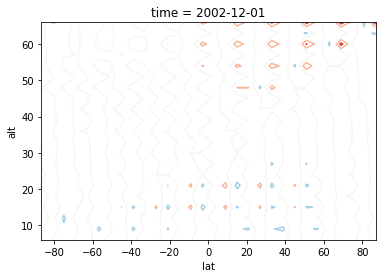

In [14]:
xr.plot.contour(ds.v_z[2])

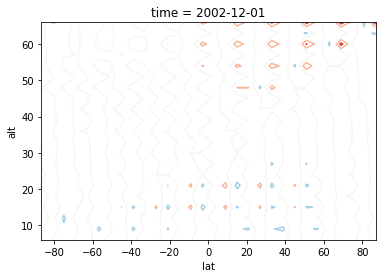

In [15]:
xr.plot.contour(ds2.v_z[2])